# Shor algorithm

In [1]:
from qiskit import *
import numpy as np
from math import pi, sqrt
import random
from qiskit.visualization import plot_histogram

from fractions import Fraction
from math import gcd
import pandas as pd

In [2]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumCircuit):
    return qiskit.visualization.plot_bloch_multivector(execute(quantumCircuit, backend).result().get_statevector())

In [3]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
#     print('Current state: ', current)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
#     print('Init state array: ',newState)
    return newState

In [4]:
def getMeasure(quantumCircuit, n):
    measures = []
    for i in range(0,n):
        outcome = execute(quantumCircuit, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [5]:
def makeCirc(n, state):
    initState = state
    print('Init state = ',initState)
    qr = QuantumRegister(n,"q")
    qc = ClassicalRegister(n, "c")
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [6]:
def getHistogram(n, circ):
    qasm_sim = Aer.get_backend('qasm_simulator')
    shots = n
    qboj = assemble(circ, shots=shots)
    results = qasm_sim.run(qboj).result()
    counts = results.get_counts()
    return counts

In [7]:
def getHistoShor(circ):
    qasm_sim = Aer.get_backend('qasm_simulator')
    t_qc = transpile(circ, qasm_sim)
#     qobj = assemble(t_qc)
    results = qasm_sim.run(t_qc).result()
    counts = results.get_counts()
    return counts

In [8]:
#FROM QISKIT Website
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc
def getDataFrame(n_count, counts):
    rows, measured_phases = [], []
    for output in counts:
        decimal = int(output, 2)  # Convert (base 2) string to decimal
        phase = decimal/(2**n_count)  # Find corresponding eigenvalue
        measured_phases.append(phase)
    rows = []
    for phase in measured_phases:
        frac = Fraction(phase).limit_denominator(15)
        rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])
    # Print as a table
    headers=["Phase", "Fraction", "Guess for r"]
    df = pd.DataFrame(rows, columns=headers)
    return df

In [9]:
def shorIt(n):
    circ = QuantumCircuit(n+4, n)
    circ.h(range(n))
    circ.x(n+3)
    for i in range(n):
        circ.append(c_amod15(a, 2**i), [i] + [j+n for j in range(4)])
    circ.append(qft_dagger(n), range(n))
    circ.measure(range(n), range(n))
    return circ

In [10]:
a = 7 #guess, 7**p
n = 8
circ = shorIt(n)

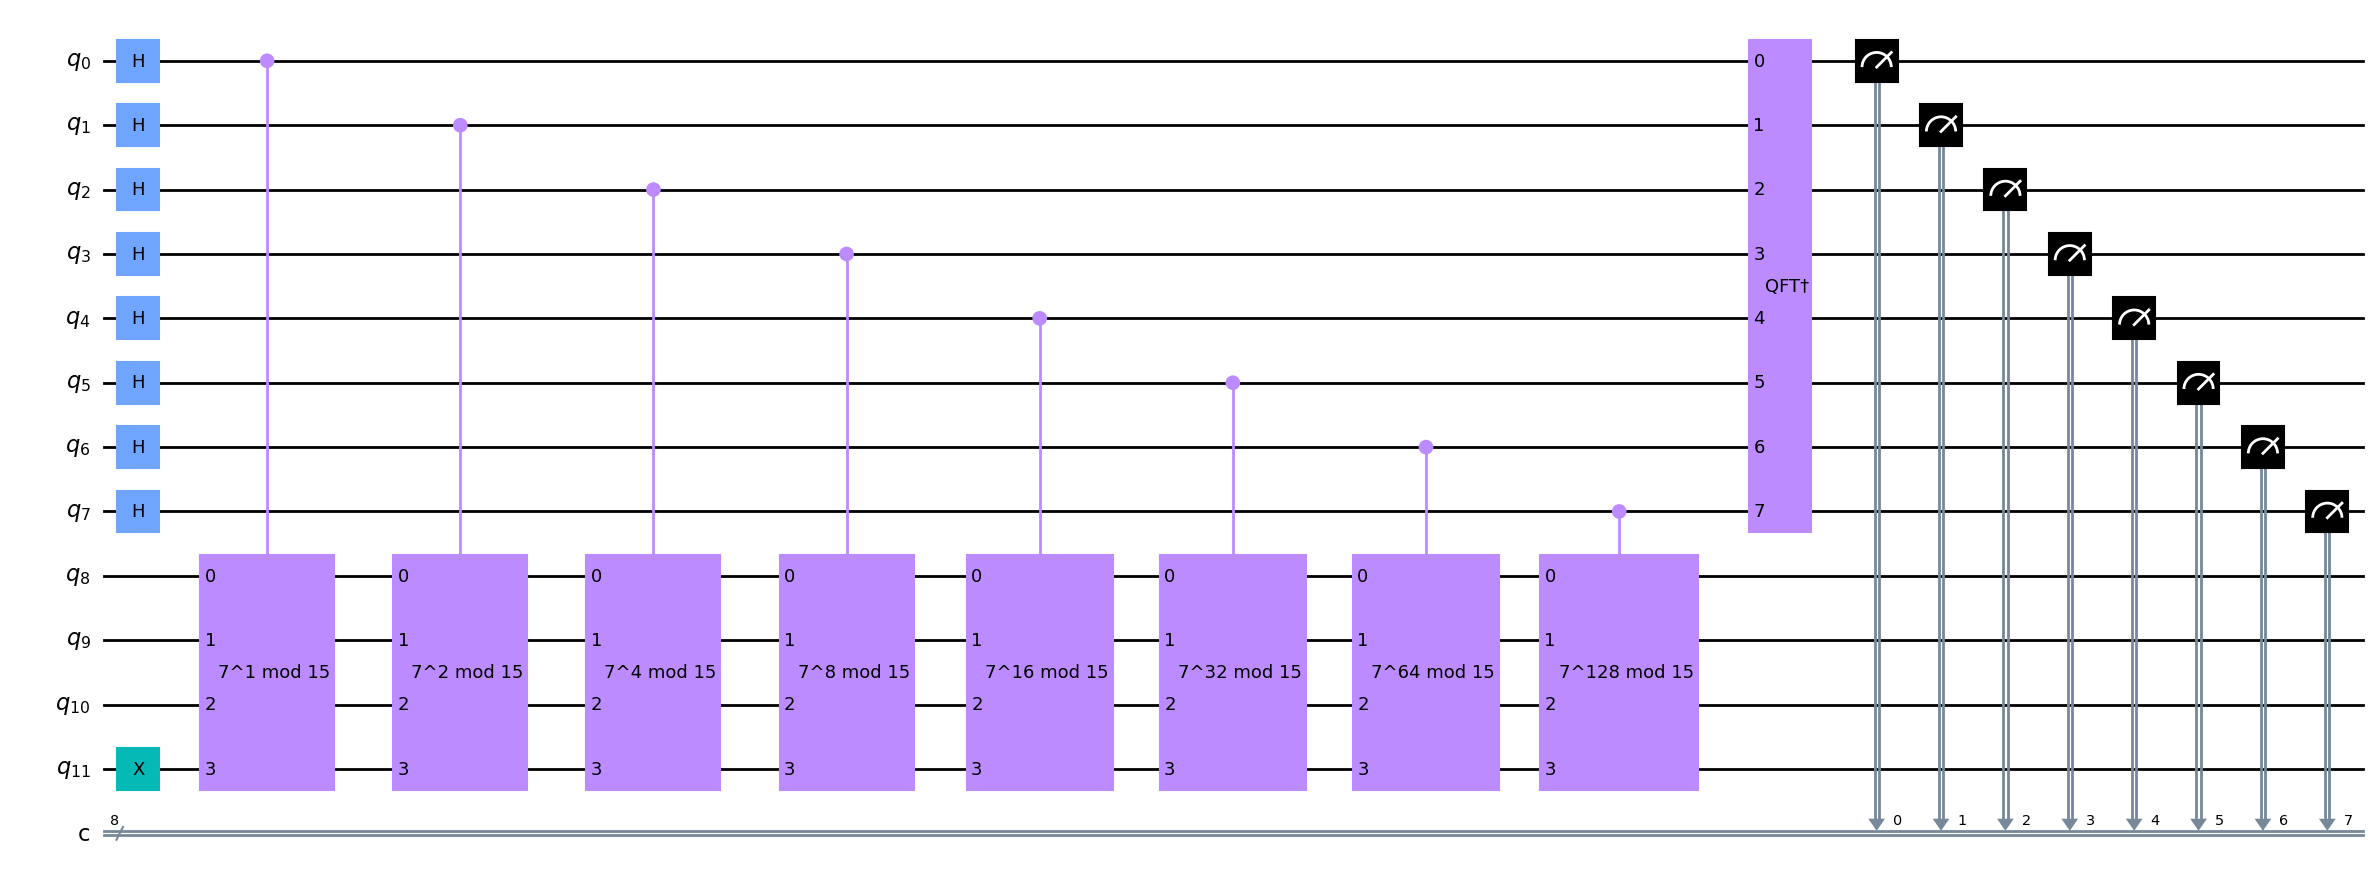

In [11]:
circ.draw('mpl',  fold=-1)

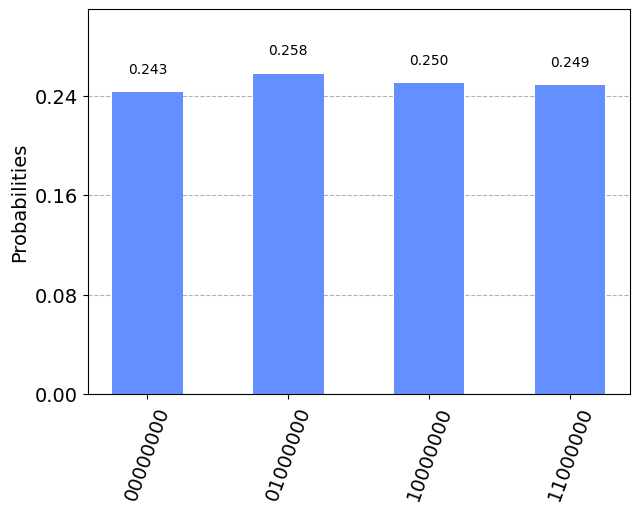

In [12]:
plot_histogram(getHistoShor(circ))

In [13]:
dataframe = getDataFrame(n, getHistoShor(circ))

In [14]:
print(dataframe)

   Phase Fraction  Guess for r
0   0.25      1/4            4
1   0.00      0/1            1
2   0.50      1/2            2
3   0.75      3/4            4


In [15]:
# p = 1, 2, 4
# Ignore 1 (odd number)
# Divide 2, 4 by 2 => 1, 2
# Check
gcd(7**1-1, 15)

3

In [16]:
gcd(7**1+1, 15) 
# Nothing -> Try 2

1

In [17]:
gcd(7**2-1, 15) 

3

In [18]:
gcd(7**2+1, 15) 

5

In [19]:
circ.decompose().draw(output='text',fold=-1)

┌─────────┐                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     